In [27]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

<h1>Theoretical time complexity of Dijkstra's Algorithm with graph being represented as an adjacency matrix and priority queue as an unordered list (normal array)</h1>

Assuming given graph is G = (V, E)

Step 1: Check all find and select a unvisited vertex with the smallest path. Require O(V) time to check all the vertices <br>
Step 2: At the new vertex, need to update a neighbour path of this new vertex to the smaller value between its current path or to the newly found. Takes O(1) time. <br>
Step 3: Do Step 2 for all the neighbours of the new vertex, and each vertex can have at most V-1 neighours, so total time becomes O(V) * O(1) = O(V)

Time Complexity Analysis <br>
Time to visit all vertices = O(V) <br>
Time to process one vertex = O(V) <br>
Therefore, total time complexity to vist and process all vertices -> O(V) * O(V) = O(V^2)

Example of Dijkstra's Algorithm Implementation
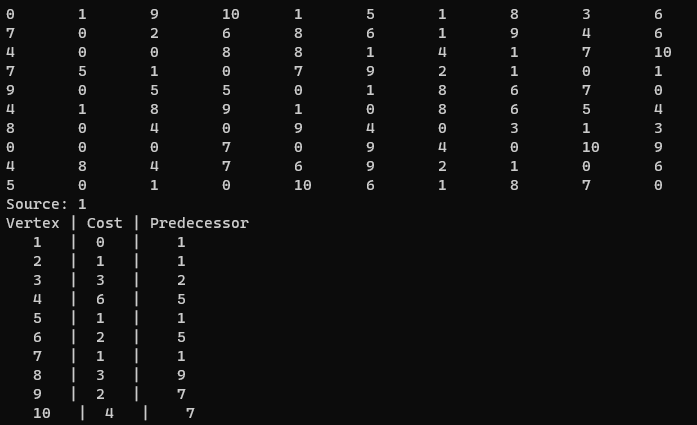

Next, collecting empirical results.

We will be collecting the run time for Dijkstra's Algorithm. So we will generate graph ranging from 100 to 10000 vertices with interval of 100. For each size, we will be generating 5 different graphs and collecting 5 timings and taking the average

In [28]:
results1 = pd.read_csv("lab2_result_1.csv")
results1["O(V^2)"] = results1["Vertices"] ** 2
results1.head(10)

,Vertices,Time 1,Time 2,Time 3,Time 4,Time 5,Average Time,O(V^2)
0,100,0.000,0.000,0.000,0.000,0.000,0.0000,10000
1,200,0.000,0.000,0.000,0.000,0.000,0.0000,40000
2,300,0.003,0.000,0.000,0.000,0.000,0.0006,90000
3,400,0.000,0.000,0.000,0.000,0.000,0.0000,160000
4,500,0.006,0.004,0.000,0.000,0.000,0.0020,250000
5,600,0.000,0.005,0.001,0.000,0.000,0.0012,360000
6,700,0.000,0.003,0.007,0.005,0.011,0.0052,490000
7,800,0.004,0.001,0.000,0.000,0.000,0.0010,640000
8,900,0.002,0.005,0.011,0.005,0.012,0.0070,810000
9,1000,0.005,0.006,0.005,0.006,0.013,0.0070,1000000


So in order to determine whether our algorithm implementation is accurate, we will first plot a graph of average timing against vertices and compare it with the time complexity against vertices. 

<AxesSubplot:xlabel='Vertices', ylabel='Average Time'>

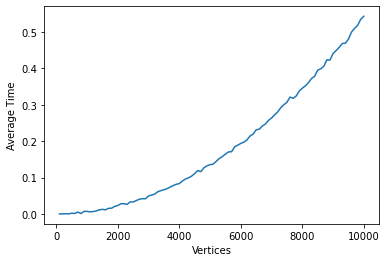

In [37]:
empirical_results = results1[['Vertices', 'Average Time']]
sb.lineplot(x = "Vertices",
            y = "Average Time",
            data = empirical_results)

#Graph of average timiing against vertices

<AxesSubplot:xlabel='Vertices', ylabel='O(V^2)'>

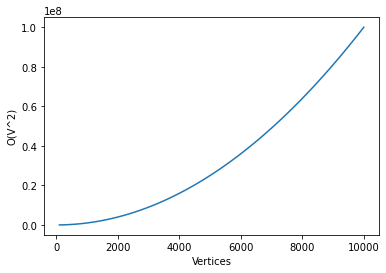

In [38]:
theoretical_results = results1[["Vertices", "O(V^2)"]]
sb.lineplot(x = "Vertices",
            y = "O(V^2)",
            data = theoretical_results)

#Graph of time complexity O(V^2) against vertices

As we can see from the 2 graphs, the shape of the two graphs is very similar. So next we will check the correlation between time complexity and average run time of our implementation

In [34]:
correlation = np.corrcoef(results1['Average Time'], results1['O(V^2)'])[0, 1]
print(correlation)

0.9998664042677605


Since the correlation of 0.999 is extremely close to 1, this suggests that there is almost a perfect linear relationship between average run time of our implementation and the theoretical time complexity.

This sugggests to us that our implementation is more likely to be correct.